In [1]:
# kernel SPAspa

# Select image-to-SCimilarity MLP epoch

In [2]:
import wandb
from wandb.apis.public.runs import Runs
from wandb.apis.public import Api
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
api = wandb.Api()
project_path = "helmholtz/mlp-img-scim-v1.1"

In [8]:
runs = api.runs("helmholtz/mlp-img-scim-v1.1")
for run in runs:
    print(run.id, run.name)

txhad7fy norm10k_full_transcriptome_250809
o0h5csku log10k_max_full_tx
9avgmrjh norm_log10kmax_full_tx
cgu70lr7 norm_log10k_full_transcriptome
gfu8grbu norm10k_full_transcriptome
pmdrtzvq norm10k_log1p_full_transcriptome
ra5hqsbc log1p_full_transcriptome
iqj6y8ia log1p_qc_passed
o7o9gbpa QC-Passed Transcriptome Row-norm
v9d49cxw QC-Passed Transcriptome
3xxurinb Full Transcriptome
vvxn36x7 efficient-lake-1


In [9]:
# Get all runs from a project that satisfy the filters
# filters = {"state": "finished", "config.optimizer": "adam"}

# help(Api())

runs = Api().runs(
    path=project_path
   # client=api.client,
   # entity="helmholtz",
   # project="mlp-img-scim-v1.1",
   # filters=filters,
)

histories = []

# Iterate over runs and print details
for run in runs:
    # print(f"Run name: {run.name}")
    # print(f"Run ID: {run.id}")
    # print(f"Run URL: {run.url}")
    # print(f"Run state: {run.state}")
    # print(f"Run config: {run.config}")
    # print(f"Run summary: {run.summary}")
    # print(f"Run history (samples=5): {run.history(samples=5)}")
    # print("----------")
    hist = run.history(
        samples=100000,
        keys=["epoch", "val_loss"],
        # format='pandas',
    )
    hist['run_name'] = run.name
    hist['run_id'] = run.id
    histories.append(hist)

# Get histories for all runs with specific metrics
# histories_df = runs.histories(
#    samples=100,  # Number of samples per run
#    keys=["loss", "accuracy"],  # Metrics to fetch
#    x_axis="_step",  # X-axis metric
#    format="pandas",  # Return as pandas DataFrame
# )


In [10]:
run_data = pd.concat(histories).reset_index(drop=True)

In [11]:
run_data

,_step,epoch,val_loss,run_name,run_id
0,3,0,0.954363,norm10k_full_transcriptome_250809,txhad7fy
1,7,1,0.809002,norm10k_full_transcriptome_250809,txhad7fy
2,12,2,0.750461,norm10k_full_transcriptome_250809,txhad7fy
3,16,3,0.724790,norm10k_full_transcriptome_250809,txhad7fy
4,21,4,0.711491,norm10k_full_transcriptome_250809,txhad7fy
...,...,...,...,...,...
63900,14226,5736,0.587820,efficient-lake-1,vvxn36x7
63901,14229,5737,0.593964,efficient-lake-1,vvxn36x7
63902,14231,5738,0.587038,efficient-lake-1,vvxn36x7
63903,14234,5739,0.585277,efficient-lake-1,vvxn36x7


In [12]:
run_data['run_name'].value_counts()

run_name
log10k_max_full_tx                   10000
QC-Passed Transcriptome               9120
norm10k_full_transcriptome_250809     8132
norm10k_full_transcriptome            6189
log1p_full_transcriptome              5934
efficient-lake-1                      5741
log1p_qc_passed                       5413
Full Transcriptome                    5049
norm10k_log1p_full_transcriptome      5038
norm_log10k_full_transcriptome        2942
QC-Passed Transcriptome Row-norm       227
norm_log10kmax_full_tx                 120
Name: count, dtype: int64

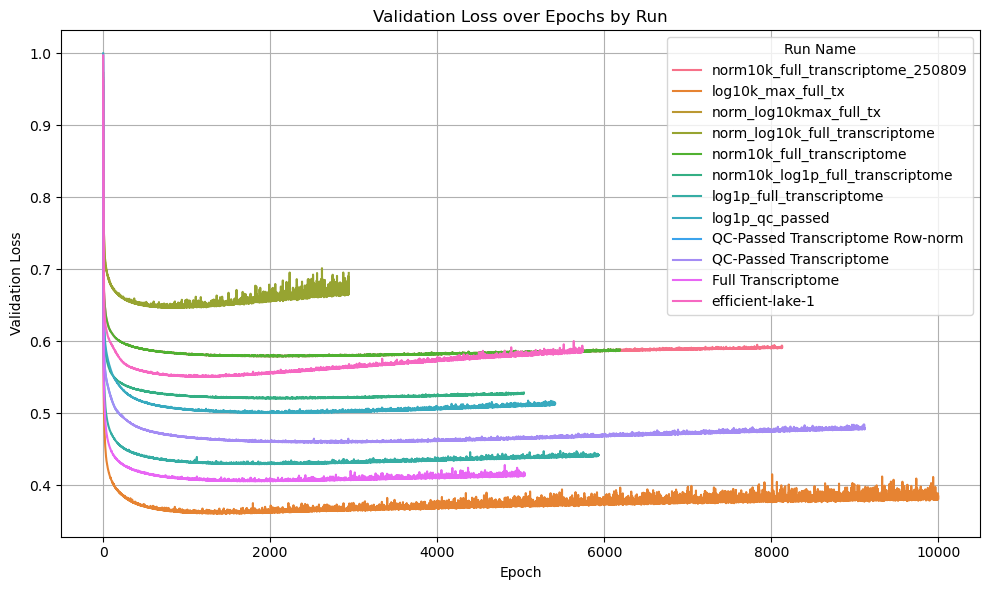

In [13]:
sns.set_palette(sns.color_palette(['#b3262a', '#2f559a', '#e46425', '#5aadc5', '#f5db12']))

plt.figure(figsize=(10, 6))
sns.lineplot(data=run_data, x='epoch', y='val_loss', hue='run_name')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs by Run')
plt.legend(title='Run Name')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
lowest_per_run = run_data.loc[run_data.groupby('run_name')['val_loss'].idxmin()]
print(lowest_per_run)

       _step  epoch  val_loss                           run_name    run_id
55114   8799   1999  0.405495                 Full Transcriptome  3xxurinb
46671   6959   2676  0.459356            QC-Passed Transcriptome  v9d49cxw
43992    584    224  0.495832   QC-Passed Transcriptome Row-norm  o7o9gbpa
59426   3131   1262  0.550731                   efficient-lake-1  vvxn36x7
9780    7254   1648  0.360517                 log10k_max_full_tx  o0h5csku
34290   8227   1869  0.429161           log1p_full_transcriptome  ra5hqsbc
40417   5362   2062  0.500476                    log1p_qc_passed  iqj6y8ia
23536  10308   2342  0.579048         norm10k_full_transcriptome  gfu8grbu
2342   10308   2342  0.579048  norm10k_full_transcriptome_250809  txhad7fy
29570   9626   2187  0.520595   norm10k_log1p_full_transcriptome  pmdrtzvq
19104   3752    852  0.646329     norm_log10k_full_transcriptome  cgu70lr7
18251    527    119  0.672577             norm_log10kmax_full_tx  9avgmrjh


In [ ]:
# v1 is only QC-passed transcriptome in scaled_minmax
# v1 is Full Transcriptome in scaled_log1p

# scaled_log1p epoch 1869 was written second by full transcriptome, so ColNorm-epoch=1869-end-v1.ckpt is full transcriptome
# 2062

In [ ]:
# ColNorm-epoch=2676-end-v1.ckpt